In [42]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print('=3')

=3


In [43]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [44]:
print('ÌõàÎ†® ÏÉòÌîåÏùò Ïàò: {}'.format(len(x_train)))
print('ÌÖåÏä§Ìä∏ ÏÉòÌîåÏùò Ïàò: {}'.format(len(x_test)))

ÌõàÎ†® ÏÉòÌîåÏùò Ïàò: 8982
ÌÖåÏä§Ìä∏ ÏÉòÌîåÏùò Ïàò: 2246


ÌõàÎ†®Ïö© Îâ¥Ïä§Ïùò ÏµúÎåÄ Í∏∏Ïù¥ :2376
ÌõàÎ†®Ïö© Îâ¥Ïä§Ïùò ÌèâÍ∑† Í∏∏Ïù¥ :145.5398574927633


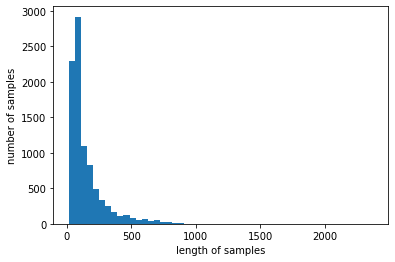

In [45]:
print('ÌõàÎ†®Ïö© Îâ¥Ïä§Ïùò ÏµúÎåÄ Í∏∏Ïù¥ :{}'.format(max(len(l) for l in x_train)))
print('ÌõàÎ†®Ïö© Îâ¥Ïä§Ïùò ÌèâÍ∑† Í∏∏Ïù¥ :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

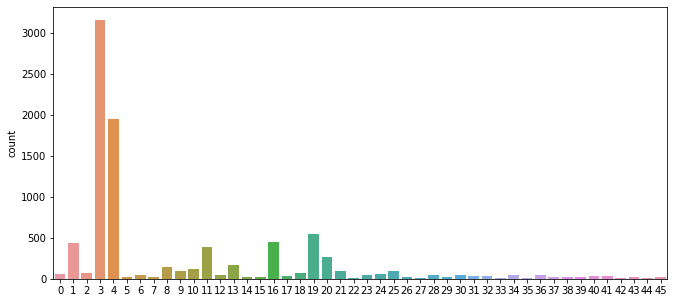

In [46]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [47]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Í∞Å ÌÅ¥ÎûòÏä§ ÎπàÎèÑÏàò:")
print(np.asarray((unique_elements, counts_elements)))

Í∞Å ÌÅ¥ÎûòÏä§ ÎπàÎèÑÏàò:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [48]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

=3


In [49]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [50]:
# index_to_wordÏóê Ïà´Ïûê 0ÏùÄ <pad>, Ïà´Ïûê 1ÏùÄ <sos>, Ïà´Ïûê 2Îäî <unk>Î•º ÎÑ£Ïñ¥Ï§çÎãàÎã§.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [51]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [52]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)  
    
x_train = decoded
print(len(x_train))

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

8982
2246


In [53]:
x_train[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

In [54]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yu

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [56]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


In [57]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


# Î™®Îç∏ Ïã§Ìóò

In [58]:
from sklearn.naive_bayes import MultinomialNB #Îã§Ìï≠Î∂ÑÌè¨ ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à Î™®Îç∏
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #Ï†ïÌôïÎèÑ¬†Í≥ÑÏÇ∞

print('=3')

=3


## 1. ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à Î∂ÑÎ•òÍ∏∞

In [59]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [60]:
x_test_dtm = dtmvector.transform(x_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º DTMÏúºÎ°ú Î≥ÄÌôò
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTMÏùÑ TF-IDF ÌñâÎ†¨Î°ú Î≥ÄÌôò

predicted = model.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.5997328584149599


## F1-Score, Confusion Matrix

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


In [62]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
          17       0.00    

In [63]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

print('=3')

=3


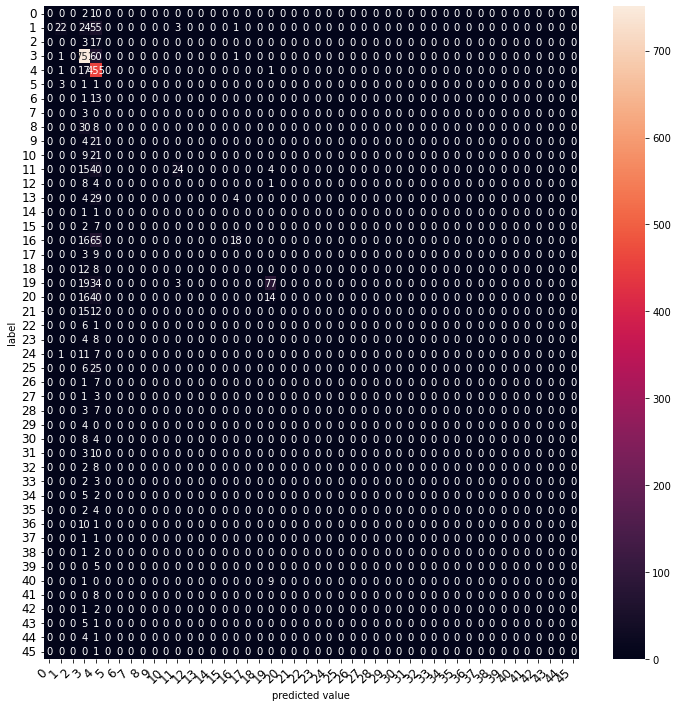

In [64]:
graph_confusion_matrix(model, tfidfv_test, y_test)

## 2. Complement Naive Bayes Classifier(CNB)

In [65]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [66]:
predicted = cb.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.7649154051647373


## 3. Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä(Logistic Regression)

In [67]:
# 10Î∂Ñ Ï†ïÎèÑ ÏÜåÏöîÎê©ÎãàÎã§.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [70]:
predicted = lr.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.8165627782724845


## 4. ÏÑ†Ìòï ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã†(Linear Support Vector Machine)

In [71]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [72]:
predicted = lsvc.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.788512911843277


## 5. Í≤∞Ï†ï Ìä∏Î¶¨(Decision Tree)

In [73]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [74]:
predicted = tree.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.6211041852181657


## 6. ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏(Random Forest)

In [76]:
#estimatorÎ•º 5Î°ú ÏÑ§Ï†ïÌïòÍ≥† random_stateÎ•º 0ÏúºÎ°ú ÏÑ§Ï†ïÌïú RandomForestClassifierÎ•º ÏÑ†Ïñ∏Ìï¥Ï£ºÏÑ∏Ïöî.
#Ï∞∏Í≥†ÏûêÎ£å : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=0)

In [77]:
predicted = forest.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.4888691006233304


## 7. Í∑∏ÎûòÎîîÏñ∏Ìä∏ Î∂ÄÏä§ÌåÖ Ìä∏Î¶¨(GradientBoostingClassifier)

In [78]:
# 15Î∂Ñ Ï†ïÎèÑ ÏÜåÏöîÎê† Ïàò ÏûàÏäµÎãàÎã§.
grbt = GradientBoostingClassifier(random_state=0, verbose=3) # verbose=3
grbt.fit(tfidfv, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.4301           15.48m
         2       76760.8864           15.37m
         3   766490025.2967           15.25m
         4 660857139232122368.0000           15.11m
         5 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           14.97m
         6 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           14.82m
         7 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           14.67m
         8 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           14.52m
         9 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584

GradientBoostingClassifier(random_state=0, verbose=3)

In [79]:
predicted = grbt.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.7702582368655387


## 8. Î≥¥ÌåÖ(Voting)

In [81]:
clf1 = LogisticRegression(penalty='l2', random_state=0, max_iter=500)
clf2 = GradientBoostingClassifier(n_estimators=50, random_state=0)
clf3 = ComplementNB()


voting_classifier = VotingClassifier(estimators=[
    ('lr', clf1), ('gb', clf2), ('cnb', clf3)], voting='soft')

voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=500, random_state=0)),
                             ('gb',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=0)),
                             ('cnb', ComplementNB())],
                 voting='soft')

In [82]:
predicted = voting_classifier.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.8000890471950134


---

---

---

# num_words = 5000

In [83]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [84]:
print('ÌõàÎ†® ÏÉòÌîåÏùò Ïàò: {}'.format(len(x_train)))
print('ÌÖåÏä§Ìä∏ ÏÉòÌîåÏùò Ïàò: {}'.format(len(x_test)))

ÌõàÎ†® ÏÉòÌîåÏùò Ïàò: 8982
ÌÖåÏä§Ìä∏ ÏÉòÌîåÏùò Ïàò: 2246


In [48]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

=3


In [85]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [86]:
# index_to_wordÏóê Ïà´Ïûê 0ÏùÄ <pad>, Ïà´Ïûê 1ÏùÄ <sos>, Ïà´Ïûê 2Îäî <unk>Î•º ÎÑ£Ïñ¥Ï§çÎãàÎã§.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [87]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [88]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

8982
2246


In [89]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [90]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 4867)


In [91]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)


# Î™®Îç∏ Ïã§Ìóò

In [92]:
from sklearn.naive_bayes import MultinomialNB #Îã§Ìï≠Î∂ÑÌè¨ ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à Î™®Îç∏
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #Ï†ïÌôïÎèÑ¬†Í≥ÑÏÇ∞

print('=3')

=3


## 1. ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à Î∂ÑÎ•òÍ∏∞

In [93]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [94]:
x_test_dtm = dtmvector.transform(x_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º DTMÏúºÎ°ú Î≥ÄÌôò
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTMÏùÑ TF-IDF ÌñâÎ†¨Î°ú Î≥ÄÌôò

predicted = model.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.6731967943009796


## F1-Score, Confusion Matrix

In [95]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


In [96]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.80      0.62       105
           2       0.00      0.00      0.00        20
           3       0.86      0.89      0.87       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.28      0.44        25
          10       0.00      0.00      0.00        30
          11       0.48      0.73      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.14      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.66      0.62        99
          17       0.00    

In [97]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

print('=3')

=3


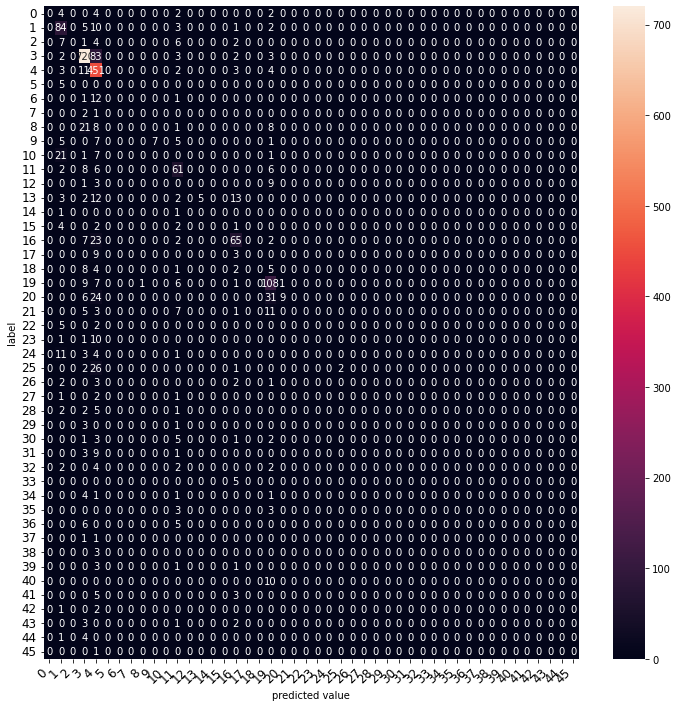

In [98]:
graph_confusion_matrix(model, tfidfv_test, y_test)

## 2. Complement Naive Bayes Classifier(CNB)

In [99]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [100]:
predicted = cb.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.7707034728406055


## 3. Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä(Logistic Regression)

In [101]:
# 10Î∂Ñ Ï†ïÎèÑ ÏÜåÏöîÎê©ÎãàÎã§.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [102]:
predicted = lr.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.8036509349955476


## 4. ÏÑ†Ìòï ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã†(Linear Support Vector Machine)

In [103]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [104]:
predicted = lsvc.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.7707034728406055


## 5. Í≤∞Ï†ï Ìä∏Î¶¨(Decision Tree)

In [105]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [106]:
predicted = tree.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.6179875333926982


## 6. ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏(Random Forest)

In [108]:
#estimatorÎ•º 5Î°ú ÏÑ§Ï†ïÌïòÍ≥† random_stateÎ•º 0ÏúºÎ°ú ÏÑ§Ï†ïÌïú RandomForestClassifierÎ•º ÏÑ†Ïñ∏Ìï¥Ï£ºÏÑ∏Ïöî.
#Ï∞∏Í≥†ÏûêÎ£å : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=0)

In [109]:
predicted = forest.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.41896705253784505


## 7. Í∑∏ÎûòÎîîÏñ∏Ìä∏ Î∂ÄÏä§ÌåÖ Ìä∏Î¶¨(GradientBoostingClassifier)

In [110]:
# 15Î∂Ñ Ï†ïÎèÑ ÏÜåÏöîÎê† Ïàò ÏûàÏäµÎãàÎã§.
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [111]:
predicted = grbt.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.767586821015138


## 8. Î≥¥ÌåÖ(Voting)

In [112]:
clf1 = LogisticRegression(penalty='l2', random_state=0, max_iter=500)
clf2 = GradientBoostingClassifier(n_estimators=50, random_state=0)
clf3 = ComplementNB()


voting_classifier = VotingClassifier(estimators=[
    ('lr', clf1), ('gb', clf2), ('cnb', clf3)], voting='soft')

voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=500, random_state=0)),
                             ('gb',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=0)),
                             ('cnb', ComplementNB())],
                 voting='soft')

In [113]:
predicted = voting_classifier.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.7960819234194123


---

---

---

# num_words = 7,500

In [114]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=7500, test_split=0.2)

In [115]:
print('ÌõàÎ†® ÏÉòÌîåÏùò Ïàò: {}'.format(len(x_train)))
print('ÌÖåÏä§Ìä∏ ÏÉòÌîåÏùò Ïàò: {}'.format(len(x_test)))

ÌõàÎ†® ÏÉòÌîåÏùò Ïàò: 8982
ÌÖåÏä§Ìä∏ ÏÉòÌîåÏùò Ïàò: 2246


In [48]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

=3


In [116]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [117]:
# index_to_wordÏóê Ïà´Ïûê 0ÏùÄ <pad>, Ïà´Ïûê 1ÏùÄ <sos>, Ïà´Ïûê 2Îäî <unk>Î•º ÎÑ£Ïñ¥Ï§çÎãàÎã§.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [118]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [119]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

8982
2246


In [120]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [121]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 7296)


In [122]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 7296)


# Î™®Îç∏ Ïã§Ìóò

In [123]:
from sklearn.naive_bayes import MultinomialNB #Îã§Ìï≠Î∂ÑÌè¨ ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à Î™®Îç∏
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #Ï†ïÌôïÎèÑ¬†Í≥ÑÏÇ∞

print('=3')

=3


## 1. ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à Î∂ÑÎ•òÍ∏∞

In [124]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [125]:
x_test_dtm = dtmvector.transform(x_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º DTMÏúºÎ°ú Î≥ÄÌôò
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTMÏùÑ TF-IDF ÌñâÎ†¨Î°ú Î≥ÄÌôò

predicted = model.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.6642920747996438


## F1-Score, Confusion Matrix

In [126]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


In [127]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.57      0.75      0.65       105
           2       0.00      0.00      0.00        20
           3       0.83      0.89      0.86       813
           4       0.55      0.95      0.69       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.16      0.28        25
          10       0.00      0.00      0.00        30
          11       0.54      0.69      0.61        83
          12       0.00      0.00      0.00        13
          13       1.00      0.05      0.10        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.64      0.62      0.63        99
          17       0.00    

In [128]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

print('=3')

=3


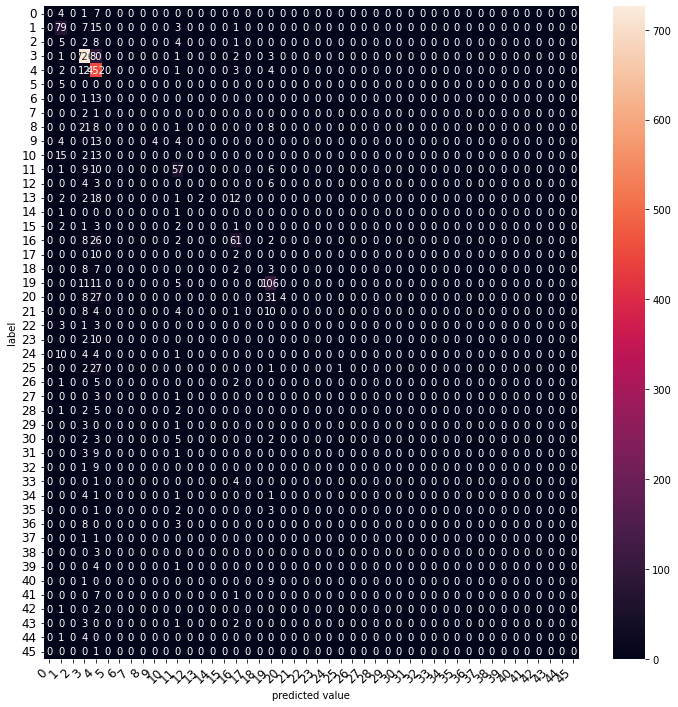

In [129]:
graph_confusion_matrix(model, tfidfv_test, y_test)

## 2. Complement Naive Bayes Classifier(CNB)

In [130]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [131]:
predicted = cb.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.7693677649154052


## 3. Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä(Logistic Regression)

In [132]:
# 10Î∂Ñ Ï†ïÎèÑ ÏÜåÏöîÎê©ÎãàÎã§.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [133]:
predicted = lr.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.8040961709706145


## 4. ÏÑ†Ìòï ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã†(Linear Support Vector Machine)

In [134]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [135]:
predicted = lsvc.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.7813891362422084


## 5. Í≤∞Ï†ï Ìä∏Î¶¨(Decision Tree)

In [136]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [137]:
predicted = tree.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.6202137132680321


## 6. ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏(Random Forest)

In [139]:
#estimatorÎ•º 5Î°ú ÏÑ§Ï†ïÌïòÍ≥† random_stateÎ•º 0ÏúºÎ°ú ÏÑ§Ï†ïÌïú RandomForestClassifierÎ•º ÏÑ†Ïñ∏Ìï¥Ï£ºÏÑ∏Ïöî.
#Ï∞∏Í≥†ÏûêÎ£å : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=0)

In [140]:
predicted = forest.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.4479073909171861


## 7. Í∑∏ÎûòÎîîÏñ∏Ìä∏ Î∂ÄÏä§ÌåÖ Ìä∏Î¶¨(GradientBoostingClassifier)

In [141]:
# 15Î∂Ñ Ï†ïÎèÑ ÏÜåÏöîÎê† Ïàò ÏûàÏäµÎãàÎã§.
grbt = GradientBoostingClassifier(random_state=0, verbose=3) # verbose=3
grbt.fit(tfidfv, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.4615           14.54m
         2       17295.3135           14.58m
         3   766430528.8453           14.43m
         4 450894550348330880.0000           14.32m
         5 2095042633646860178453929072057861269238987980194085277337947388270850312260026368.0000           14.18m
         6 2095042633646860178453929072057861269238987980194085277337947388270850312260026368.0000           14.04m
         7 2095042633646860178453929072057861269238987980194085277337947388270850312260026368.0000           13.88m
         8 2095042633646860178453929072057861269238987980194085277337947388270850312260026368.0000           13.74m
         9 2095042633646860178453929072057861269238987980194085277337947388270850312260026368.0000           13.61m
        10 2095042633646860178453929072057861269238987980194085277337947388270850312260026368.0000           13.47m
        11 209504263364686017845392907205786126923898798019408527733794

GradientBoostingClassifier(random_state=0, verbose=3)

In [142]:
predicted = grbt.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.7693677649154052


## 8. Î≥¥ÌåÖ(Voting)

In [144]:
clf1 = LogisticRegression(penalty='l2', random_state=0, max_iter=500)
clf2 = GradientBoostingClassifier(n_estimators=50, random_state=0)
clf3 = ComplementNB()


voting_classifier = VotingClassifier(estimators=[
    ('lr', clf1), ('gb', clf2), ('cnb', clf3)], voting='soft')

voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=500, random_state=0)),
                             ('gb',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=0)),
                             ('cnb', ComplementNB())],
                 voting='soft')

In [145]:
predicted = voting_classifier.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, predicted)) #ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê

Ï†ïÌôïÎèÑ: 0.7956366874443455


---

---

---

# Îî•Îü¨ÎãùÎ™®Îç∏

In [146]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=7500, test_split=0.2)

In [147]:
print('ÌõàÎ†® ÏÉòÌîåÏùò Ïàò: {}'.format(len(x_train)))
print('ÌÖåÏä§Ìä∏ ÏÉòÌîåÏùò Ïàò: {}'.format(len(x_test)))

ÌõàÎ†® ÏÉòÌîåÏùò Ïàò: 8982
ÌÖåÏä§Ìä∏ ÏÉòÌîåÏùò Ïàò: 2246


In [148]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

=3


In [149]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [150]:
# index_to_wordÏóê Ïà´Ïûê 0ÏùÄ <pad>, Ïà´Ïûê 1ÏùÄ <sos>, Ïà´Ïûê 2Îäî <unk>Î•º ÎÑ£Ïñ¥Ï§çÎãàÎã§.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [151]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [152]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

8982
2246


In [153]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [154]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 7296)


In [155]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 7296)


## Î™®Îç∏Ïã§Ìóò : 1D CNN

In [160]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.datasets import reuters


In [161]:
# Îã®Ïñ¥ Ïàò Ï†úÌïú (ÎÑàÎ¨¥ ÎßéÏùÄ Îã®Ïñ¥Î•º ÏÇ¨Ïö©ÌïòÎ©¥ ÌïôÏäµÏù¥ Ïñ¥Î†§Ïö∏ Ïàò ÏûàÏùå)
vocab_size = 7500  

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)

# ÏµúÎåÄ Îã®Ïñ¥ Í∏∏Ïù¥ ÏÑ§Ï†ï (Í∞ÄÏû• Í∏¥ ÏÉòÌîå Í∏∞Ï§Ä)
max_len = max(len(seq) for seq in x_train)

# Ìå®Îî© Ï†ÅÏö©
x_train = pad_sequences(x_train, maxlen=max_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')

# Î†àÏù¥Î∏îÏùÑ Ïõê-Ìï´ Ïù∏ÏΩîÎî© (Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•òÎ•º ÏúÑÌï¥ ÌïÑÏöî)
num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {x_train.shape}, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {x_test.shape}")
print(f"Î†àÏù¥Î∏î ÌÅ¨Í∏∞: {y_train.shape}, {y_test.shape}")


ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (8982, 2376), ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (2246, 2376)
Î†àÏù¥Î∏î ÌÅ¨Í∏∞: (8982, 46), (2246, 46)


In [162]:
# 1D CNN Î™®Îç∏ Íµ¨ÏÑ±
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2376, 128)         960000    
_________________________________________________________________
conv1d (Conv1D)              (None, 2372, 128)         82048     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 1,053,294
Trainable params: 1,053,294
Non-trainable params: 0
____________________________________________

In [163]:
# Î™®Îç∏ ÌïôÏäµ
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
141/141 [==============================] - 12s 35ms/step - loss: 2.3428 - accuracy: 0.4615 - val_loss: 1.7481 - val_accuracy: 0.5352
Epoch 2/10
141/141 [==============================] - 5s 33ms/step - loss: 1.6053 - accuracy: 0.6145 - val_loss: 1.3374 - val_accuracy: 0.6955
Epoch 3/10
141/141 [==============================] - 5s 33ms/step - loss: 1.2610 - accuracy: 0.7103 - val_loss: 1.1619 - val_accuracy: 0.7315
Epoch 4/10
141/141 [==============================] - 5s 33ms/step - loss: 1.0635 - accuracy: 0.7475 - val_loss: 1.0760 - val_accuracy: 0.7471
Epoch 5/10
141/141 [==============================] - 5s 33ms/step - loss: 0.8995 - accuracy: 0.7817 - val_loss: 1.0031 - val_accuracy: 0.7658
Epoch 6/10
141/141 [==============================] - 5s 33ms/step - loss: 0.7741 - accuracy: 0.8059 - val_loss: 0.9791 - val_accuracy: 0.7747
Epoch 7/10
141/141 [==============================] - 5s 33ms/step - loss: 0.6611 - accuracy: 0.8324 - val_loss: 0.9588 - val_accuracy: 0.775

In [164]:
# ÌèâÍ∞Ä
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: {test_acc:.4f}")

71/71 [==============================] - 1s 7ms/step - loss: 1.0059 - accuracy: 0.7854
ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 0.7854


# Í≤∞Í≥º Ï†ïÎ¶¨

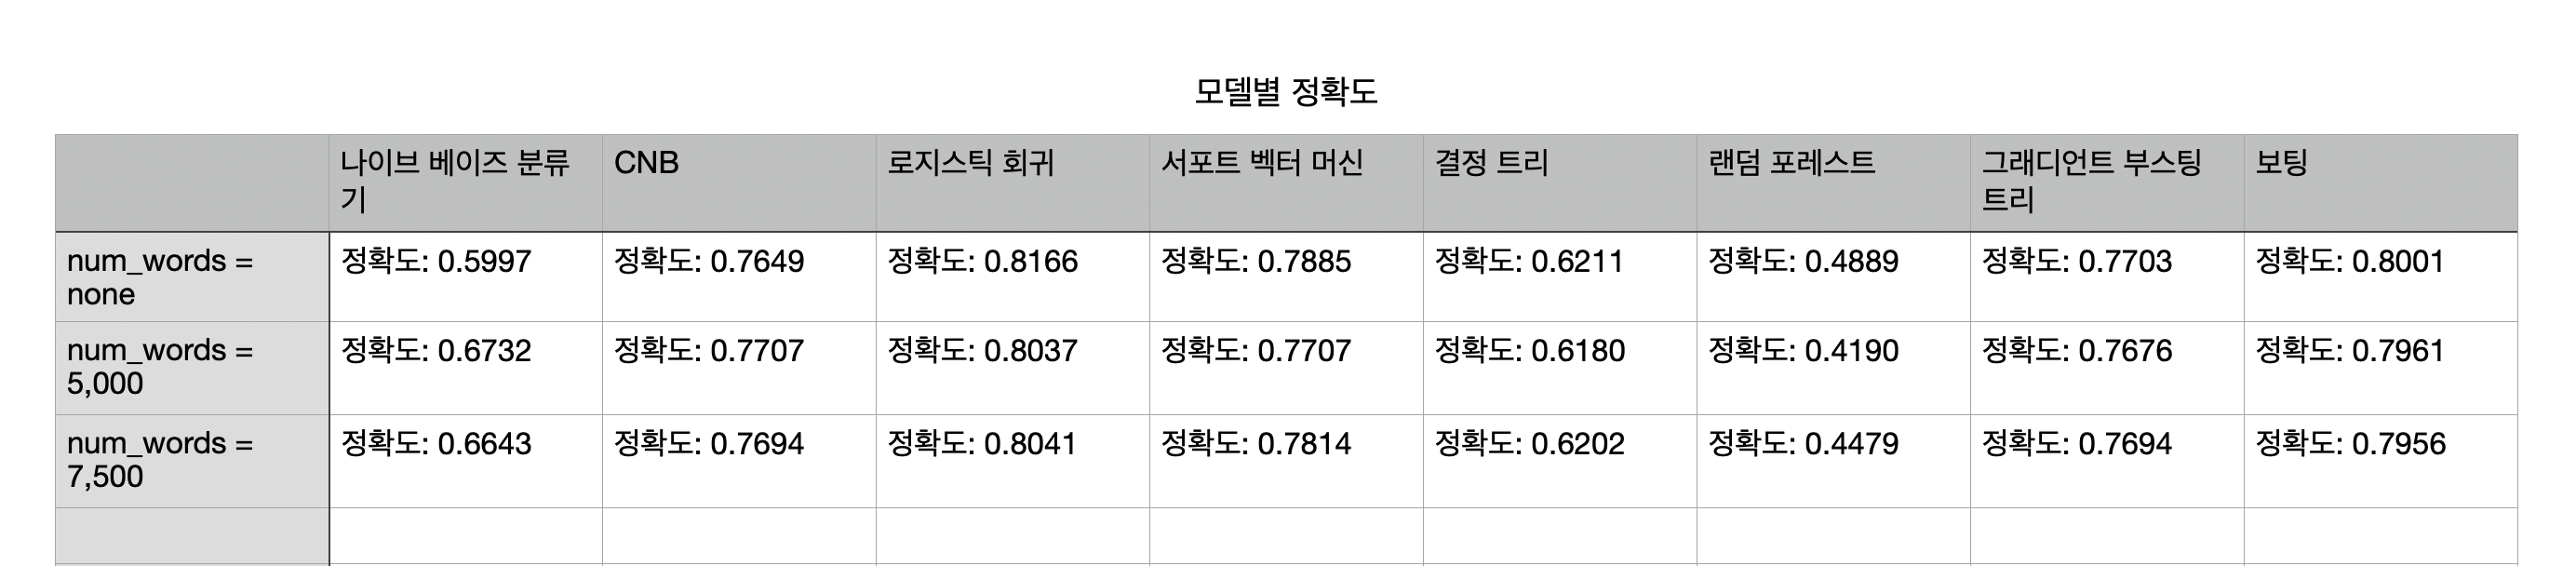

+) Îî•Îü¨Îãù Î™®Îç∏ Ï†ïÌôïÎèÑ = 0.7854

Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ Ï°∞Ìï©ÏùÄ num_words= noneÏúºÎ°ú ÏÑ§Ï†ï, Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä (=0.8106)ÏûÖÎãàÎã§.




```

Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÍ∞Ä votingÎ≥¥Îã§ ÏÑ±Îä•Ïù¥ Îçî Ï¢ãÍ≤å ÎÇòÏôîÎäîÎç∞ Ïù¥Îü¨Ìïú Ïù¥Ïú†ÏóêÎäî
ÏÜåÌîÑÌä∏ Î≥¥ÌåÖ(Soft Voting) vs. ÌïòÎìú Î≥¥ÌåÖ(Hard Voting) Ï∞®Ïù¥, 
Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Î¨∏Ï†úÍ∞Ä ÏûàÎäî Í≤É Í∞ôÏäµÎãàÎã§.

```

# üìå 1. Vocabulary SizeÏóê Îî∞Î•∏ Î®∏Ïã†Îü¨Îãù Î™®Îç∏Ïùò ÏÑ±Îä• Î≥ÄÌôî Î∂ÑÏÑù
### ‚ë† Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÑ±Îä• Î≥ÄÌôî Í≤ΩÌñ•
* ÎåÄÎ∂ÄÎ∂ÑÏùò Î®∏Ïã†Îü¨Îãù Î™®Îç∏ÏóêÏÑú num_words = none (Ï†úÌïú ÏóÜÏùå)Ïùº Îïå **Ï†ïÌôïÎèÑÍ∞Ä Í∞ÄÏû• ÎÜíÏùå**
* ÌïòÏßÄÎßå **ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à, CNBÎäî vocab sizeÍ∞Ä ÌÅ¥ÏàòÎ°ù Ïò§ÌûàÎ†§ ÏÑ±Îä•Ïù¥ Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•**ÏùÑ Î≥¥ÏûÑ
* Î∞òÎ©¥, Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä, ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã†(SVM), Î≥¥ÌåÖ Îì±ÏùÄ num_words = noneÏóêÏÑú ÏµúÍ≥† ÏÑ±Îä•ÏùÑ Í∏∞Î°ù

### ‚ë° Ï£ºÏöî Î™®Îç∏Î≥Ñ Î∂ÑÏÑù

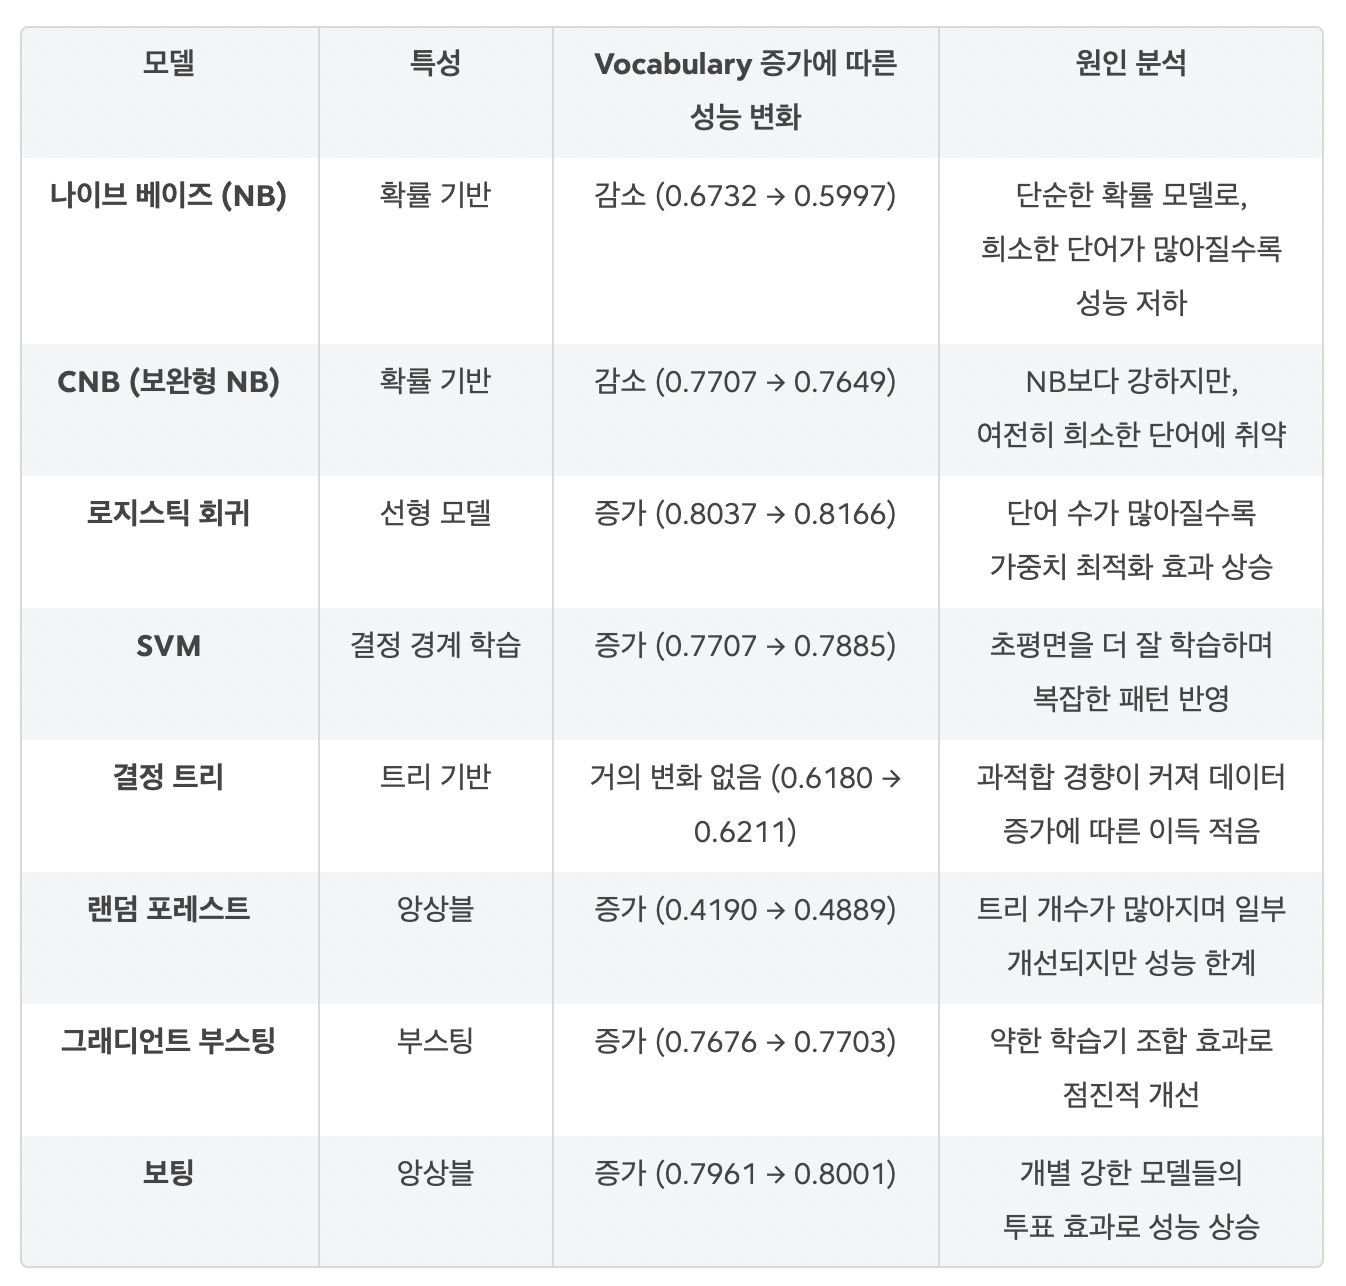

### ‚ë¢ Ïôú CNB/NBÎäî vocab Ï¶ùÍ∞Ä Ïãú ÏÑ±Îä•Ïù¥ ÎÇÆÏïÑÏßàÍπå?
* NB Í∏∞Î∞ò Î™®Îç∏Îì§ÏùÄ ÌôïÎ•†Ï†ÅÏúºÎ°ú **Îã®Ïñ¥ Í∞Ñ ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï**ÏùÑ ÌïòÎØÄÎ°ú, Î∂àÌïÑÏöîÌïú Îã®Ïñ¥Í∞Ä ÎßéÏïÑÏßàÏàòÎ°ù Î™®Îç∏Ïù¥ ÌòºÎûÄÏä§Îü¨ÏõåÏßê
* ÌäπÌûà Ìù¨ÏÜåÌïú Îã®Ïñ¥Îì§Ïù¥ ÎßéÏïÑÏßàÏàòÎ°ù Í≥ºÎåÄÏ†ÅÌï© Í∞ÄÎä•ÏÑ±Ïù¥ Ïª§Ïßê
* Î∞òÎ©¥, Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä, SVMÏùÄ **Í∞ÄÏ§ëÏπòÎ•º Ï°∞Ï†àÌïòÎ©¥ÏÑú ÌïôÏäµ**ÌïòÎØÄÎ°ú ÏÑ±Îä•Ïù¥ Ï†êÏßÑÏ†ÅÏúºÎ°ú Ìñ•ÏÉÅ


# üìå 2. Îî•Îü¨Îãù (1D-CNN) Î™®Îç∏Í≥ºÏùò ÏÑ±Îä• ÎπÑÍµê
### ‚ë† 1D-CNN ÏÑ±Îä• (0.7854)
* Î≥¥ÌåÖ (0.8001), Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä (0.8166)Î≥¥Îã§ ÎÇÆÏùå
* ÌïòÏßÄÎßå SVM (0.7885), Í∑∏ÎûòÎîîÏñ∏Ìä∏ Î∂ÄÏä§ÌåÖ (0.7703)Í≥º ÎπÑÏä∑Ìïú ÏàòÏ§Ä

### ‚ë° Ïôú CNNÏù¥ Í∏∞ÎåÄÎ≥¥Îã§ ÎÇÆÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥ÏòÄÏùÑÍπå?

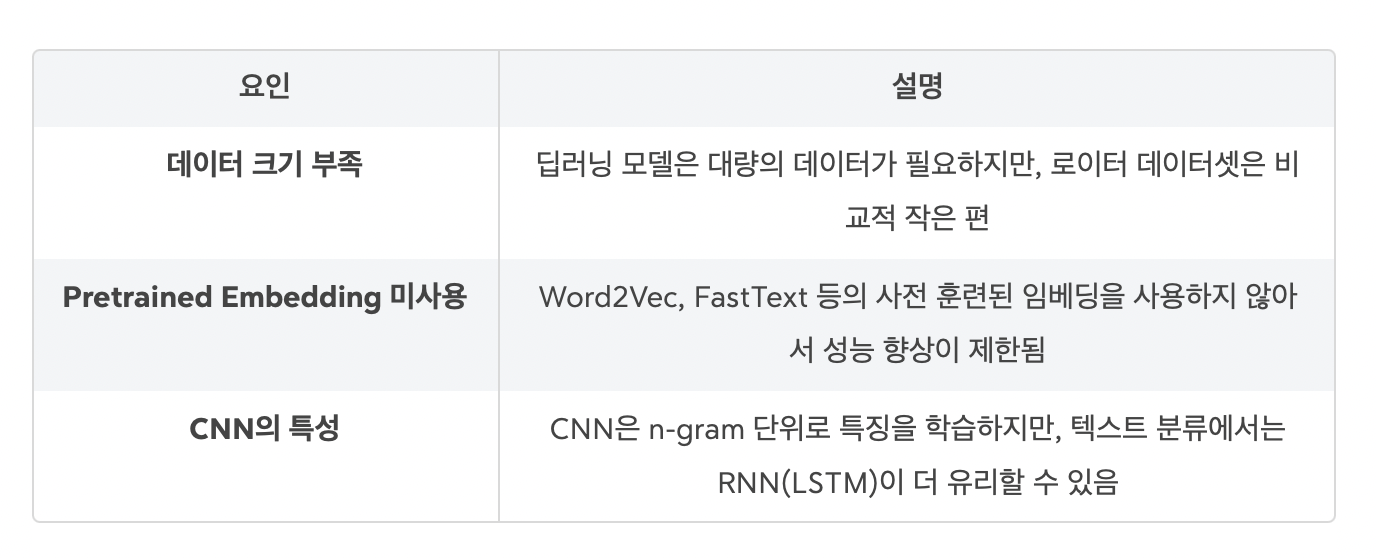

### ‚ë¢ Î®∏Ïã†Îü¨Îãù Î™®Îç∏Í≥º ÎπÑÍµêÌñàÏùÑ Îïå 1D-CNNÏùò Í∞ïÏ†ê
* **Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌï† Í≤ΩÏö∞, CNNÏùÄ ÎçîÏö± Í∞ïÎ†•Ìïú ÏÑ±Îä•**ÏùÑ Î∞úÌúòÌï† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùå
* Î®∏Ïã†Îü¨Îãù Î™®Îç∏Í≥º Îã¨Î¶¨ **Îã®Ïñ¥ Í∞ÑÏùò ÏßÄÏó≠Ï†Å Ìå®ÌÑ¥(n-gram feature)ÏùÑ Ìö®Í≥ºÏ†ÅÏúºÎ°ú ÌïôÏäµ** Í∞ÄÎä•


# ÌöåÍ≥†

Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú num_wordsÏùò ÏàòÍ∞Ä ÎÜíÏùÑÎïå Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º Î≥¥Ïù∏Îã§Îäî Í≤ÉÏùÑ ÏïåÍ≤åÎêòÏóàÎã§.
Í∑†ÌòïÏûàÎäî Îç∞Ïù¥ÌÑ∞ÏùºÎïåÏùò Í≤∞Í≥ºÎèÑ Í∂ÅÍ∏àÌï¥ÏßëÎãàÎã§.

Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏßïÍ≥º vocab_sizeÏóê Îî∞Îùº Ï†ÅÌï©Ìïú Î∂ÑÎ•ò Î™®Îç∏Ïù¥ Îã¨ÎùºÏßÄÎäî Í≤ÉÏù¥ Ïã†Í∏∞ÌñàÏäµÎãàÎã§.